###Import of Libraries

In [ ]:
import pandas as pd
import io
from google.colab import files
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
uploaded = files.upload()

Saving crabs.csv to crabs (2).csv


In [ ]:
crabs_data = pd.read_csv("crabs.csv")
# Rename the columns
crabs_data = crabs_data.rename(columns={'sp':'species','FL':'Frontal Lobe','RW':'Rear Width','CL':'Carapace Midline',
                                        'CW':'Maximum Width','BD':'Body Depth'})

crabs_data['species'] = crabs_data['species'].map({'B':'Blue','O':'Orange'})
crabs_data['sex'] = crabs_data['sex'].map({'M':'Male','F':'Female'})


In [ ]:
crabs_data.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class,TSNE1,TSNE2
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale,55.430222,0.066210
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale,53.167706,-0.537725
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale,51.684399,-1.921721
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale,49.233978,-3.858639
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale,49.704563,-5.033280


The goal is to separate the 200 crabs into four classes, given by the 2x2 configurations for sex (male/female) and species (blue/orange).

In [ ]:
crabs_data['class'] = crabs_data.species + crabs_data.sex


In [ ]:
data_columns = ['Frontal Lobe','Rear Width','Carapace Midline','Maximum Width','Body Depth']

## t-Stochastic Neighbor Embedding (t-SNE)


### Using raw data ( no process )

### 2 Dimensions

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


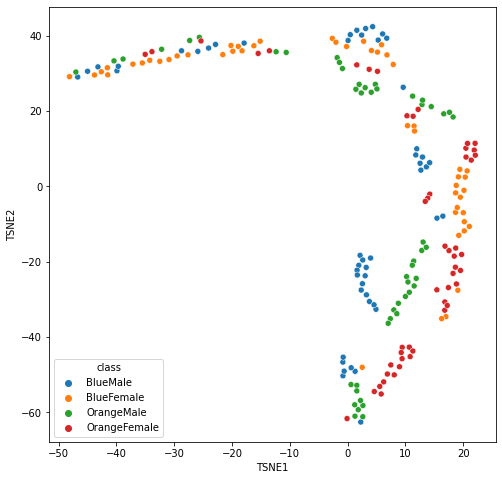

In [ ]:
crabs_tsne = TSNE(n_components=2,perplexity=10,n_iter=2000,init='random').fit_transform(crabs_data[data_columns])
crabs_data[['TSNE1','TSNE2']] = crabs_tsne

fig = plt.figure(figsize=(8,8))
sns.scatterplot(x='TSNE1',y='TSNE2',hue='class',data=crabs_data)


### 3 Dimensions

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


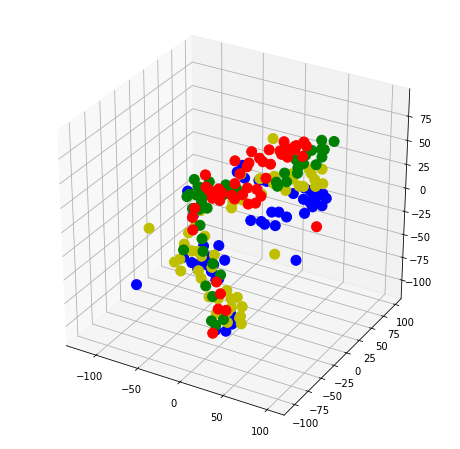

In [ ]:
crabs_tsne = TSNE(n_components=3,perplexity=10,n_iter=2000,init='random').fit_transform(crabs_data[data_columns])
crabs_data[['TSNE1','TSNE2','TSNE3']] = crabs_tsne

colors_crabs = {'BlueFemale':'y','BlueMale':'b','OrangeFemale':'r','OrangeMale':'g'}


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')

plt.scatter(crabs_data.TSNE1,crabs_data.TSNE2,zs=crabs_data.TSNE3,depthshade=False,
            c=crabs_data['class'].apply(lambda x: colors_crabs[x]),s=100)


In [ ]:
fig = px.scatter_3d(crabs_data,x='TSNE1',y='TSNE2',z='TSNE3',color='class')
fig.show()

### Using on the Scaled Data

In [ ]:
crabs_data.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale


In [ ]:
crabs_min_max = crabs_data.copy()
crabs_min_max[data_columns] = MinMaxScaler().fit_transform(crabs_data[data_columns])

In [ ]:
crabs_min_max.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class,TSNE1,TSNE2
0,Blue,Male,1,0.056604,0.014599,0.042553,0.050667,0.058065,BlueMale,20.625175,29.337358
1,Blue,Male,2,0.100629,0.087591,0.103343,0.098667,0.083871,BlueMale,21.504011,27.571774
2,Blue,Male,3,0.125786,0.094891,0.130699,0.141333,0.103226,BlueMale,22.769701,26.728817
3,Blue,Male,4,0.150943,0.102190,0.164134,0.160000,0.135484,BlueMale,23.800768,25.415045
4,Blue,Male,5,0.163522,0.109489,0.170213,0.157333,0.135484,BlueMale,23.593872,24.356195


### 2D

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



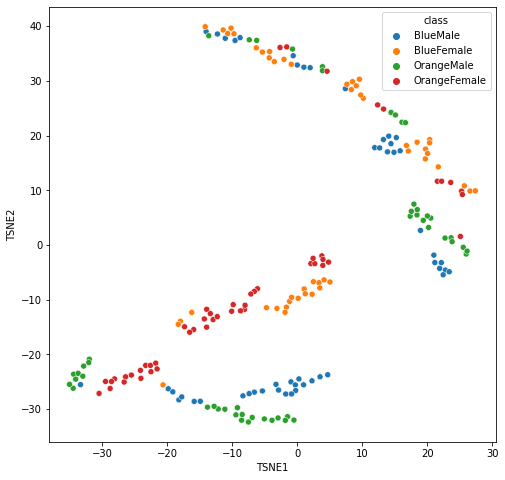

In [ ]:
crabs_tsne = TSNE(n_components=2,perplexity=10,n_iter=1000,init='random').fit_transform(crabs_min_max[data_columns])
crabs_min_max[['TSNE1','TSNE2',]] = crabs_tsne


fig = plt.figure(figsize=(8,8))
sns.scatterplot(x='TSNE1',y='TSNE2',hue='class',data=crabs_min_max)

### 3D

In [ ]:
crabs_tsne = TSNE(n_components=3,perplexity=10,n_iter=2000,init='random').fit_transform(crabs_min_max[data_columns])
crabs_min_max[['TSNE1','TSNE2','TSNE3']] = crabs_tsne

crabs_min_max.head()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class,TSNE1,TSNE2,TSNE3
0,Blue,Male,1,0.056604,0.014599,0.042553,0.050667,0.058065,BlueMale,-28.357754,-16.552048,-65.350761
1,Blue,Male,2,0.100629,0.087591,0.103343,0.098667,0.083871,BlueMale,-23.939077,-12.765214,-61.002808
2,Blue,Male,3,0.125786,0.094891,0.130699,0.141333,0.103226,BlueMale,-26.412548,-7.344750,-64.494286
3,Blue,Male,4,0.150943,0.102190,0.164134,0.160000,0.135484,BlueMale,-23.474152,-2.242307,-67.867050
4,Blue,Male,5,0.163522,0.109489,0.170213,0.157333,0.135484,BlueMale,-25.669903,-0.176895,-62.720009


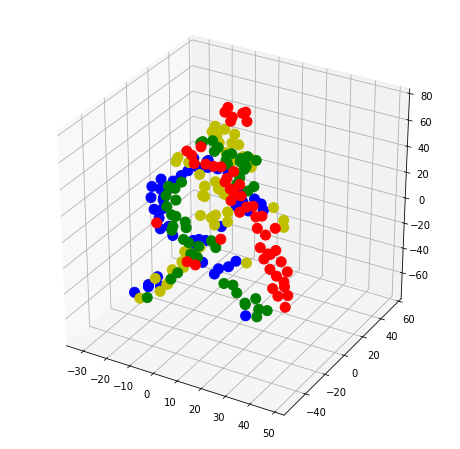

In [ ]:
colors_crabs = {'BlueFemale':'y','BlueMale':'b','OrangeFemale':'r','OrangeMale':'g'}


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')

plt.scatter(crabs_min_max.TSNE1,crabs_min_max.TSNE2,zs=crabs_min_max.TSNE3,depthshade=False,
            c=crabs_min_max['class'].apply(lambda x: colors_crabs[x]),s=100)

In [ ]:
fig = px.scatter_3d(crabs_min_max,x='TSNE1',y='TSNE2',z='TSNE3',color='class')
fig.show()

### Using on Standardized Data

In [ ]:
crabs_data.describe()

In [ ]:
crabs_data.tail()

In [ ]:
crabs_standardized = crabs_data.copy()
crabs_standardized[data_columns] = StandardScaler().fit_transform(crabs_data[data_columns])

In [ ]:
crabs_standardized.describe()

### 2D

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



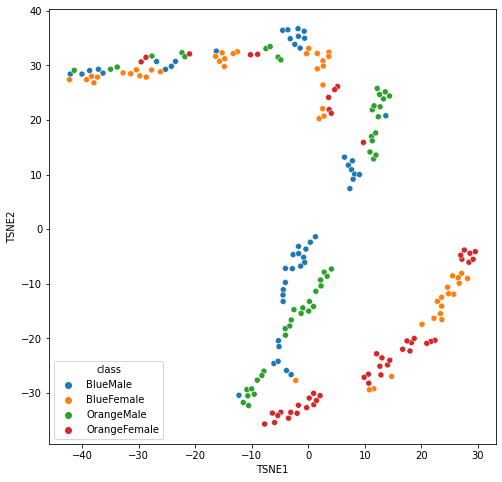

In [ ]:
crabs_tsne = TSNE(n_components=2,perplexity=10,n_iter=1000,init='random').fit_transform(crabs_standardized[data_columns])
crabs_standardized[['TSNE1','TSNE2',]] = crabs_tsne


fig = plt.figure(figsize=(8,8))
sns.scatterplot(x='TSNE1',y='TSNE2',hue='class',data=crabs_standardized)

### 3D

In [ ]:
crabs_tsne = TSNE(n_components=3,perplexity=10,n_iter=2000,init='random').fit_transform(crabs_standardized[data_columns])
crabs_standardized[['TSNE1','TSNE2','TSNE3']] = crabs_tsne

crabs_standardized.head()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class,TSNE1,TSNE2,TSNE3
0,Blue,Male,1,-2.146232,-2.352450,-2.253926,-2.217772,-2.057989,BlueMale,14.682420,-59.153511,43.556900
1,Blue,Male,2,-1.945462,-1.962875,-1.972282,-1.988538,-1.940899,BlueMale,13.933331,-71.563187,38.302216
2,Blue,Male,3,-1.830736,-1.923917,-1.845543,-1.784775,-1.853083,BlueMale,4.657846,-66.119095,35.526333
3,Blue,Male,4,-1.716010,-1.884960,-1.690638,-1.695629,-1.706721,BlueMale,-4.944230,-70.657776,31.911062
4,Blue,Male,5,-1.658647,-1.846002,-1.662474,-1.708364,-1.706721,BlueMale,-5.813551,-65.866371,40.638901


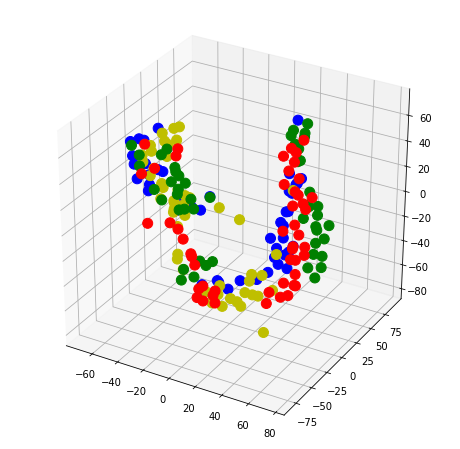

In [ ]:
colors_crabs = {'BlueFemale':'y','BlueMale':'b','OrangeFemale':'r','OrangeMale':'g'}


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')

plt.scatter(crabs_standardized.TSNE1,crabs_standardized.TSNE2,zs=crabs_standardized.TSNE3,depthshade=False,
            c=crabs_standardized['class'].apply(lambda x: colors_crabs[x]),s=100)

In [ ]:
fig = px.scatter_3d(crabs_standardized,x='TSNE1',y='TSNE2',z='TSNE3',color='class')
fig.show()